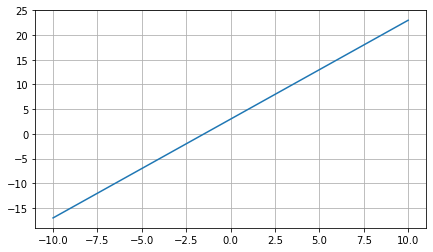

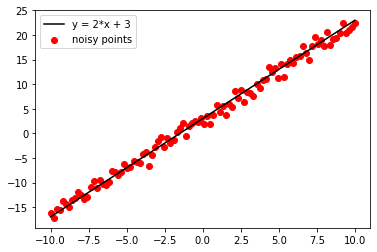

In [5]:
#Akash Lal Dutta
#Roll : 226101001
#1
import matplotlib.pyplot as plt
import numpy as np
import random
import cmath
x = np.linspace(-10, 10, num = 100)
#plt.xlim(-10, 10)
y = 2*x + 3
fig = plt.figure(figsize = (7, 4))
# Create the plot
plt.plot(x, y)
plt.grid()
#plt.legend()
plt.show()

sigma = 1
noise = np.random.normal(0, sigma, 100)
y_n = y + noise
plt.plot(x, y, 'k-', label = 'y = 2*x + 3')
plt.scatter(x, y_n, c = 'r', label = 'noisy points')
plt.legend()
plt.show()

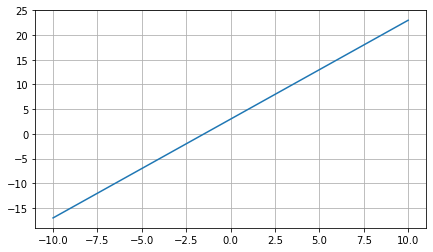

[(1, 5), (-7, -11), (-9, -15), (-9, -15), (-8, -13), (8, 19), (4, 11), (-9, -15), (9, 21), (5, 13), (3, 9), (3, 9), (-5, -7), (-4, -5), (4, 11), (5, 13), (8, 19), (-1, 1), (2, 7), (4, 11), (2, 7), (9, 21), (-2, -1), (7, 17), (-3, -3), (-1, 1), (-4, -5), (-9, -15), (7, 17), (9, 21), (-9, -15), (-4, -5), (-3, -3), (-7, -11), (-3, -3), (-7, -11), (-8, -13), (-2, -1), (-4, -5), (-7, -11), (6, 15), (-9, -15), (-3, -3), (8, 19), (-9, -15), (-9, -15), (-3, -3), (9, 21), (6, 15), (3, 9), (-2, -1), (-1, 1), (1, 5), (2, 7), (1, 5), (-7, -11), (-3, -3), (-8, -13), (-7, -11), (3, 9), (8, 19), (1, 5), (7, 17), (7, 17), (-10, -17), (-1, 1), (1, 5), (7, 17), (-3, -3), (-5, -7), (-4, -5), (-4, -5), (-10, -17), (4, 11), (1, 5), (1, 5), (9, 21), (8, 19), (2, 7), (5, 13), (0, 3), (6, 15), (6, 15), (-6, -9), (9, 21), (-6, -9), (-9, -15), (8, 19), (-2, -1), (0, 3), (-4, -5), (6, 15), (0, 3), (-2, -1), (8, 19), (1, 5), (-4, -5), (-10, -17), (4, 11), (-7, -11)]


In [6]:
#1.b
#for printing the value of 100 random points
import matplotlib.pyplot as plt
import numpy as np
import random
import cmath
X = np.linspace(-10, 10, num = 100)
#plt.xlim(-10, 10)
y = 2*X + 3
fig = plt.figure(figsize = (7, 4))
# Create the plot
plt.plot(X, y)
plt.grid()
#plt.legend()
plt.show()
list = []
for i in range (100):
  x = np.random.randint(-10, 10)
  y = 2*x + 3
  pair = x,y
  list.append(pair)
print(list)

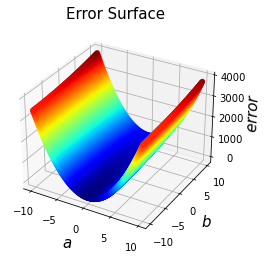

In [8]:
#2
import numpy as np
A=np.arange(-10,10,0.1)
B=np.arange(-10,10,0.1)

def y_i(x, a, b):
     return a*x + b
# Compute element wise error
def compute_error(Y_n, Y_hat):
    e=np.array(Y_n)-Y_hat # element wise error
    return e

# Compute average error
def compute_avg_error(e):
    e_avg=sum(e**2)/len(e) # average error
    return e_avg
#plt.xlim(-10, 10)
X = np.linspace(-10, 10, num = 100)
y = 2*x + 3
sigma = 1
noise = np.random.normal(0, sigma, 100)
y_n = y + noise
# Compute average error values for all combination of a and b.
E_avg=[] # average error
a_b=[]
for a in A:
    for b in B:
        Y_hat= np.array([y_i(x, a, b) for x in X])  
        e=compute_error(y_n, Y_hat) # element wise error
        e_avg=compute_avg_error(e) # average error
        E_avg.append(e_avg)
        a_b.append((a,b))

# importing mplot3d toolkits, numpy and matplotlib
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis
x = [a[0] for a in a_b] 
y = [b[1] for b in a_b]
z = np.array(E_avg)
 
# plotting error surface
# ax.plot3D(x,y,z)
ax.scatter3D(x, y, z, c=z, cmap='jet')
ax.set_xlabel('$a$', fontsize=15)
ax.set_ylabel('$b$', fontsize=15)
ax.set_zlabel('$error$', fontsize=15)

ax.set_title('Error Surface', fontsize=15)
plt.show()

Computed MSE:  0.9784518757486234
Computed 𝑅−𝑠𝑞𝑢𝑎𝑟𝑒𝑑 measure:  0.9996921213324187


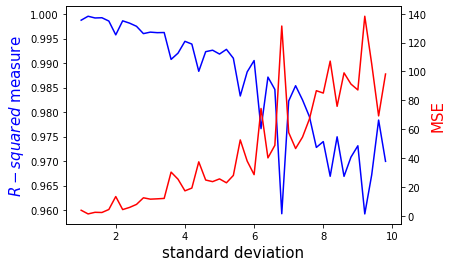

In [11]:
#3
X_i = np.linspace(-10, 10, 200)
Y_i = [y_i(x, a, b) + random.gauss(0,1) for x in X_i]

from sklearn.model_selection import train_test_split
# using the train test split function
X_train, X_test, Y_train, Y_test = train_test_split(X_i,Y_i ,
                                   random_state=104, 
                                   test_size=0.5, 
                                   shuffle=True)

# Problem Formulation using Pseudo-Inverse
def cpi(X_train,Y_train):  
    A=[]
    for x in X_train:
        p=np.array([1,x])
        A.append(p)
    A=np.array(A)
    Y=Y_train

    P= np.dot(np.linalg.inv( np.dot(A.T,A)) ,(np.dot(A.T, Y)))
    return P

# function to predict Y
def pred_y(P,X_test):    
    a_estimated=P[0]
    b_estimated=P[1]
    Y_pred= [y_i(x, a_estimated, b_estimated) for x in X_test]
    return Y_pred

# function to compute 𝑅−𝑠𝑞𝑢𝑎𝑟𝑒𝑑 measure
def com_R_sq_error(Y_test,Y_pred): 
    R_sq_error= 1- (sum((np.array(Y_test)-np.array(Y_pred))**2))/sum((np.array([y- np.mean(Y_test) for y in Y_test ]))**2)
    return R_sq_error
# function to compute MSE
def com_MSE(Y_test,Y_pred):
    MSE= (sum((np.array(Y_test)-np.array(Y_pred))**2))/len(Y_test)
    return MSE

# Estimating a, b using Pseudo-Inverse
P=cpi(X_train,Y_train)
# Predicting Y
Y_pred=pred_y(P,X_test)
# Compute the 𝑅−𝑠𝑞𝑢𝑎𝑟𝑒𝑑 measure
R_sq_error=com_R_sq_error(Y_test,Y_pred)
# Compute the MSE
MSE=com_MSE(Y_test,Y_pred)
print("Computed MSE: ", MSE)
print("Computed 𝑅−𝑠𝑞𝑢𝑎𝑟𝑒𝑑 measure: ", R_sq_error)

# functinon to compute MSE and R2 by taking different value of standard deviation(𝜎)
def com_error_sigma(sigma):
    X_i = np.linspace(-10, 10, 200)
    # (e)Generate a set of n points around the line using given equation
    Y_i = [y_i(x, a, b) + random.gauss(0,sigma) for x in X_i]
    # using the train test split function
    X_train, X_test, Y_train, Y_test = train_test_split(X_i,Y_i ,
                                       random_state=104, 
                                       test_size=0.5, 
                                       shuffle=True)
    P=cpi(X_train,Y_train)
    Y_pred=pred_y(P,X_test)
    R_sq_error=com_R_sq_error(Y_test,Y_pred)
    MSE=com_MSE(Y_test,Y_pred)
    return R_sq_error, MSE

# Experiment with different values of standard deviation(𝜎) andobserve the impact on the values of MSE and 𝑅2
R_sq_errors=[]
MSEs=[]
sigmas=np.arange(1,10,0.2)
for sigma in sigmas:
    r,m=com_error_sigma(sigma)
    R_sq_errors.append(r)
    MSEs.append(m)
# plotting MSE and the 𝑅−𝑠𝑞𝑢𝑎𝑟𝑒𝑑 measure for different value of standard deviation(𝜎)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(sigmas, R_sq_errors, 'b-')
ax2.plot(sigmas, MSEs, 'r-')

ax1.set_xlabel('standard deviation',fontsize=15)
ax1.set_ylabel('$R-squared$ measure ', color='b',fontsize=15)
ax2.set_ylabel('MSE', color='r',fontsize=15)
plt.show()

In [9]:
R_sq_errors

[0.9997135411253998,
 0.9989469052833064,
 0.9991039932385871,
 0.9987626538024296,
 0.9991059593164981,
 0.9978309986509594,
 0.9982545114169132,
 0.996889639198849,
 0.9976836849854411,
 0.9976701724039919,
 0.9956144037600476,
 0.9925378723725878,
 0.9954673643417583,
 0.9961088579887218,
 0.9939954439685508,
 0.9953817152179326,
 0.9860435142005561,
 0.9920728144318702,
 0.9949135423799498,
 0.9843436937133977,
 0.9825145430618614,
 0.9894232220378091,
 0.9904459310853888,
 0.9885479211440706,
 0.9855958323049265,
 0.9868133265144536,
 0.9855015171855925,
 0.9879896019687986,
 0.9844701792727657,
 0.9764976877937962,
 0.9875810600411136,
 0.9836478891849658,
 0.9699916254231266,
 0.9835893499417343,
 0.9809559464736072,
 0.9790238622619225,
 0.9796190752957649,
 0.9799189365092433,
 0.9759306543306379,
 0.9667945678274431,
 0.9742478628185561,
 0.9702963292167893,
 0.9690228188290902,
 0.967664380341257,
 0.9731108830703]

In [10]:
P

array([9.97439925, 9.91871585])

/tmp/ipykernel_5792/3659595227.py:9: RuntimeWarning: overflow encountered in square
  cost = np.sum((y_true-y_predicted)**2) / len(y_true)
/tmp/ipykernel_5792/3588045481.py:40: RuntimeWarning: invalid value encountered in scalar subtract
  if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
/tmp/ipykernel_5792/3588045481.py:49: RuntimeWarning: overflow encountered in scalar add
  weight_derivative = -(2/n) * sum(x * (y-y_predicted))
/tmp/ipykernel_5792/3588045481.py:50: RuntimeWarning: invalid value encountered in scalar add
  bias_derivative = -(2/n) * sum(y-y_predicted)
/tmp/ipykernel_5792/3588045481.py:53: RuntimeWarning: invalid value encountered in scalar subtract
  a = a - (learning_rate * weight_derivative)


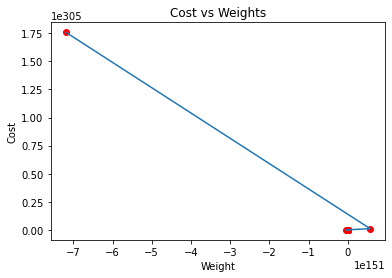

Estimated Weight: nan
Estimated Bias: nan


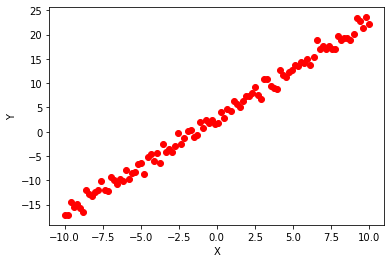

In [13]:
#4
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
 
def mean_squared_error(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost
 
# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_ascent(x, y, iterations = 100, learning_rate = 0.0001, stopping_threshold = 1e-6):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters
    for i in range(iterations):
        # Making predictions
        y_predicted = (current_weight * x) + current_bias
        # Calculating the current cost
        current_cost = mean_squared_error(y, y_predicted)
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
            
        previous_cost = current_cost
        costs.append(current_cost)
        weights.append(current_weight)
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
        
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
        
        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \ {current_weight}, Bias {current_bias}")
     
     
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return current_weight, current_bias
 
def main():
    
    X = np.linspace(-10, 10, 100)

    # (c)Compute the values of y for each x as yi = 2xi + 3.

    def y_i(x, a, b):
         return a*x + b

    Y= [y_i(x, 2, 3) + random.gauss(0,1) for x in X]
    # Data
    X = np.array(X)
    Y = np.array(Y)
 
    # Estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=200000)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")
 
    # Making predictions using estimated parameters
    Y_pred = estimated_weight * X + estimated_bias
 
    # Plotting the regression line
    plt.figure(figsize = (6,4))
    plt.scatter(X, Y, marker='o', color='red')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
             markersize=10,linestyle='dashed')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
 
     
if __name__=="__main__":
    main()